In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pylab as plt
print(os.listdir("../input"))

['last-10-subs-data', 'lanl-submissions', 'LANL-Earthquake-Prediction']


![](https://files.slack.com/files-pri/TJ8UK7F1Q-FK90XAA3G/img_20190602_173521.png)

# Assumptions
- Test set in that image are the same in this competition.
- There are 9 Quakes in the test set with max TTF:
    - 11 sec
    - 11 sec
    - 11 sec
    - 5 sec
    - 10 sec
    - 15 sec
    - 7 sec
    - 15 sec to 10 sec

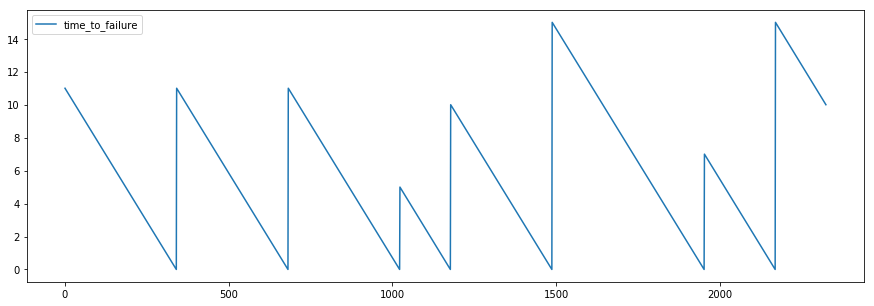

In [2]:
samp_per_second = 31
ttf_array = np.concatenate([np.linspace(11, 0, samp_per_second * 11),
                np.linspace(11, 0, samp_per_second * 11),
                np.linspace(11, 0, samp_per_second * 11),
                np.linspace(5, 0, samp_per_second * 5),
                np.linspace(10, 0, samp_per_second * 10),
                np.linspace(15, 0, samp_per_second * 15),
                np.linspace(7, 0, samp_per_second * 7),
                np.linspace(15, 10, samp_per_second * 5)])
ss = pd.read_csv('../input/LANL-Earthquake-Prediction/sample_submission.csv')
ss_simulated = pd.DataFrame(ttf_array, columns=['time_to_failure'])
ss_simulated.plot(figsize=(15, 5))

In [3]:
ss_simulated.agg(['mean','median'])

,time_to_failure
mean,5.913333
median,5.412037


In [7]:
sub1352 = pd.read_csv('../input/lanl-submissions/LB1.352_submission_147.csv')
sub1389 = pd.read_csv('../input/lanl-submissions/LB1.389_submissionverson_one.csv')
sub1362 = pd.read_csv('../input/lanl-submissions/LB1.362_submission_147.csv')
sub1371 = pd.read_csv('../input/lanl-submissions/LB1.371_submission_137.csv')
sub1380 = pd.read_csv('../input/lanl-submissions/LB1.380_submission.csv')
sub1381 = pd.read_csv('../input/lanl-submissions/LB1.381_submission_147.csv')
sub1389 = pd.read_csv('../input/lanl-submissions/LB1.389_submissionverson_one.csv')
sub_50feats = pd.read_csv('../input/lanl-submissions/submission_50feats_peaks 9000ks.csv')

ss['sub1.352'] = sub1352['time_to_failure']
ss['sub1.389'] = sub1389['time_to_failure']
ss['sub1.362'] = sub1362['time_to_failure']
ss['sub1.371'] = sub1371['time_to_failure']
ss['sub1.380'] = sub1380['time_to_failure']
ss['sub1.381'] = sub1381['time_to_failure']
ss['sub1.389'] = sub1389['time_to_failure']
ss['simulated'] = ss_simulated['time_to_failure']

# Compare Distributions

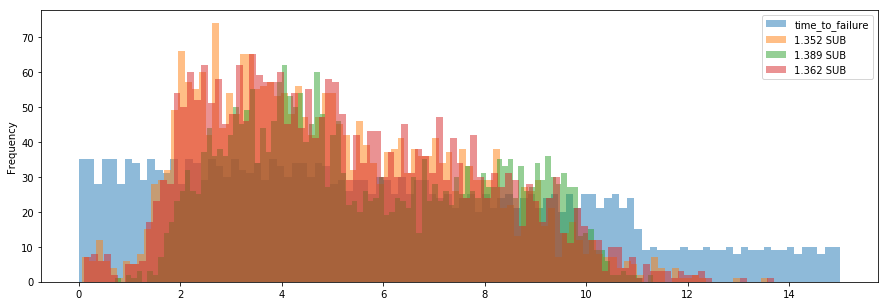

In [8]:
ss_simulated.plot(kind='hist', bins= 100, figsize=(15, 5), alpha=0.5)
sub1352['time_to_failure'].plot(kind='hist', bins= 100, figsize=(15, 5), label='1.352 SUB', alpha=0.5)
sub1389['time_to_failure'].plot(kind='hist', bins= 100, figsize=(15, 5), label='1.389 SUB', alpha=0.5)
sub1362['time_to_failure'].plot(kind='hist', bins= 100, figsize=(15, 5), label='1.362 SUB', alpha=0.5)
plt.legend()
plt.show()

In [9]:
ss.agg(['mean','median'])

,time_to_failure,sub1.352,sub1.389,sub1.362,sub1.371,sub1.380,sub1.381,simulated,sub1350_2037CV,sub1355_2038CV,sub1383_1991CV,sub1388_2086CV,sub1404_2009CV,sub1432_xgb,sub1529_xgb,sub1532_1948CV,sub1534_2092CV,sub1863_2283CV
mean,0.0,5.036651,5.608539,5.198344,4.897558,5.499909,5.491079,5.913333,5.003089,4.973409,4.916806,5.321881,4.873406,5.751348,5.905072,5.456124,5.029913,4.690853
median,0.0,4.697758,5.056110,4.846402,4.424708,5.131707,5.129596,5.412037,4.458852,4.439515,4.416439,4.857533,4.314198,5.354137,5.459199,5.024674,4.597988,4.048971


In [10]:
sub1389.agg(['mean','median'])

,time_to_failure
mean,5.608539
median,5.056110


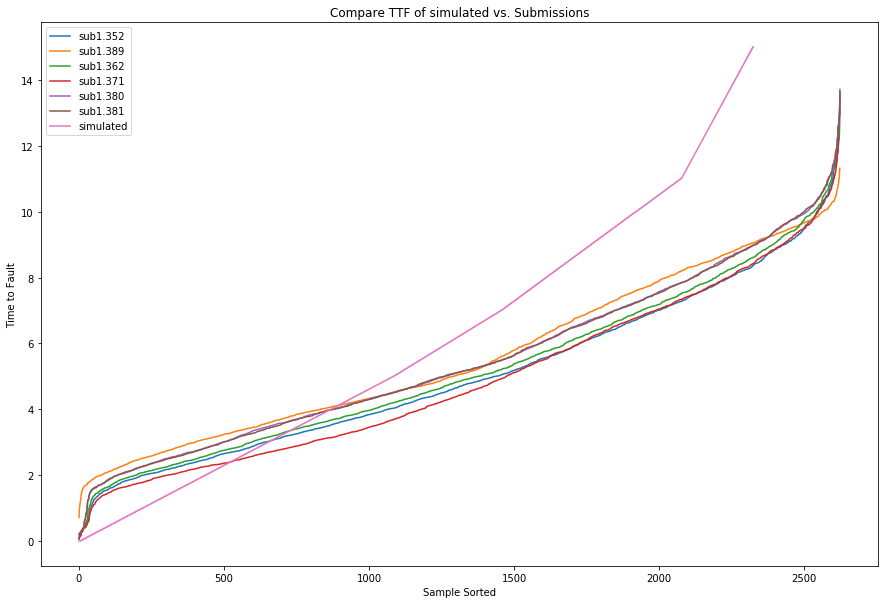

In [11]:
ss.sort_values('sub1.352').reset_index()['sub1.352'].plot(figsize=(15, 10), title='Compare TTF of simulated vs. Submissions')
ss.sort_values('sub1.389').reset_index()['sub1.389'].plot(figsize=(15, 10), title='Compare TTF of simulated vs. Submissions')
ss.sort_values('sub1.362').reset_index()['sub1.362'].plot(figsize=(15, 10), title='Compare TTF of simulated vs. Submissions')
ss.sort_values('sub1.371').reset_index()['sub1.371'].plot(figsize=(15, 10), title='Compare TTF of simulated vs. Submissions')
ss.sort_values('sub1.380').reset_index()['sub1.380'].plot(figsize=(15, 10), title='Compare TTF of simulated vs. Submissions')
ss.sort_values('sub1.381').reset_index()['sub1.381'].plot(figsize=(15, 10), title='Compare TTF of simulated vs. Submissions')
ss.sort_values('simulated').reset_index()['simulated'].plot(figsize=(15, 10), title='Compare TTF of simulated vs. Submissions')

plt.xlabel('Sample Sorted')
plt.ylabel('Time to Fault')
plt.legend()
plt.show()

# Last 10 Subs

In [12]:
sub1350_2037CV = pd.read_csv('../input/last-10-subs-data/1350_submission_lgb_FINALSHUFFLED_2.037CV_123Feats_24000Rows.csv')
sub1355_2038CV = pd.read_csv('../input/last-10-subs-data/1355_submission_lgb_FINALSHUFFLED_2.038CV_119Feats_24000Rows.csv')
sub1383_1991CV = pd.read_csv('../input/last-10-subs-data/1383_submission_lgb_FINALSHUFFLED_1.991CV_120Feats_24000Rows.csv')
sub1388_2086CV = pd.read_csv('../input/last-10-subs-data/1398_submission_lgb_FINALSHUFFLED_2.086CV_138Feats_24000Rows.csv')
sub1404_2009CV = pd.read_csv('../input/last-10-subs-data/1404_submission_lgb_FINALSHUFFLED_2.009CV_116Feats_24000Rows.csv')
sub1432_xgb = pd.read_csv('../input/last-10-subs-data/1432_submission_xgb_FINALSHUFFLED.csv')
sub1529_xgb = pd.read_csv('../input/last-10-subs-data/1529_submission_xgb_FINALSHUFFLED.csv')
sub1532_1948CV = pd.read_csv('../input/last-10-subs-data/1532_submission_lgb_1.948CV_110Feats_24000Rows_15Fold.csv')
sub1534_2092CV = pd.read_csv('../input/last-10-subs-data/1534_submission_lgb_FINALSHUFFLED_2.092CV_24Feats_24000Rows.csv')
sub1863_2283CV = pd.read_csv('../input/last-10-subs-data/1863_submission_lgb_FINALSHUFFLED_2.283CV_17Feats_24000Rows.csv')

ss['sub1350_2037CV'] = sub1350_2037CV['time_to_failure']
ss['sub1355_2038CV'] = sub1355_2038CV['time_to_failure']
ss['sub1383_1991CV'] = sub1383_1991CV['time_to_failure']
ss['sub1388_2086CV'] = sub1388_2086CV['time_to_failure']
ss['sub1404_2009CV'] = sub1404_2009CV['time_to_failure']
ss['sub1432_xgb'] = sub1432_xgb['time_to_failure']
ss['sub1529_xgb'] = sub1529_xgb['time_to_failure']
ss['sub1532_1948CV'] = sub1532_1948CV['time_to_failure']
ss['sub1534_2092CV'] = sub1534_2092CV['time_to_failure']
ss['sub1863_2283CV'] = sub1863_2283CV['time_to_failure']

In [13]:
ss.agg(['mean','median'])

,time_to_failure,sub1.352,sub1.389,sub1.362,sub1.371,sub1.380,sub1.381,simulated,sub1350_2037CV,sub1355_2038CV,sub1383_1991CV,sub1388_2086CV,sub1404_2009CV,sub1432_xgb,sub1529_xgb,sub1532_1948CV,sub1534_2092CV,sub1863_2283CV
mean,0.0,5.036651,5.608539,5.198344,4.897558,5.499909,5.491079,5.913333,5.003089,4.973409,4.916806,5.321881,4.873406,5.751348,5.905072,5.456124,5.029913,4.690853
median,0.0,4.697758,5.056110,4.846402,4.424708,5.131707,5.129596,5.412037,4.458852,4.439515,4.416439,4.857533,4.314198,5.354137,5.459199,5.024674,4.597988,4.048971


In [14]:
submit = pd.read_csv('../input/LANL-Earthquake-Prediction/sample_submission.csv')

In [20]:
submit['time_to_failure'] = ss[['sub1.380','sub1.381','sub1529_xgb','sub1532_1948CV','sub1432_xgb']].mean(axis=1)

In [21]:
submit.agg(['mean','median'])

,time_to_failure
mean,5.620706
median,5.178536


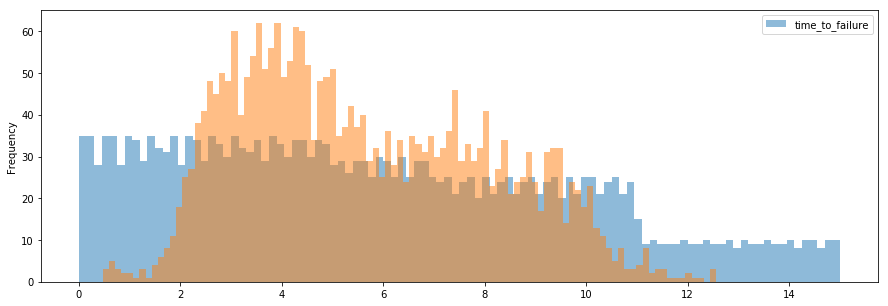

In [24]:
ss_simulated.plot(kind='hist', bins= 100, figsize=(15, 5), alpha=0.5)
submit['time_to_failure'].plot(kind='hist', bins= 100, figsize=(15, 5), alpha=0.5)
plt.show()

In [ ]:
submit.to_csv('blend_5_including2xgb.csv', index=False)